# Data Cleaning

In [1]:
import pandas as pd
import numpy as np

import glob
import datetime
import gmaps
import matplotlib.pyplot as plt

In [2]:
path = "../Resources/Airbnb/Current_Listing/listings.csv"
hotel_path = "../Resources/Hotel/hotel_data.csv"
listing_df = pd.read_csv(path, low_memory = False)
hotel_df = pd.read_csv(hotel_path)
hotel_df.head()

,City,District,ADR,Month
0,Manhattan,Battery Park City,$100,Jun-18
1,Manhattan,Chelsea,$100,Jun-18
2,Manhattan,East Village,$100,Jun-18
3,Manhattan,Greenwich Village,$100,Jun-18
4,Manhattan,Hell's Kitchen,$100,Jun-18


In [3]:
cols = ["id", "name", "host_since", 
        "neighbourhood_cleansed", "city", "state", "zipcode", 'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', "amenities",
        'price', 'cleaning_fee','minimum_nights', 'maximum_nights',
        'number_of_reviews','review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
        'instant_bookable','is_business_travel_ready',
        "host_is_superhost","host_response_time","host_response_rate"]
listing_rdc_df = listing_df[cols]
listing_rdc_df.head()

,id,name,host_since,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,host_is_superhost,host_response_time,host_response_rate
0,2539,Clean & quiet apt home by the park,2008-09-07,Kensington,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,...,10.0,10.0,10.0,10.0,10.0,f,f,f,within an hour,100%
1,2595,Skylit Midtown Castle,2008-09-09,Midtown,New York,NY,10018,40.75362,-73.98377,Apartment,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within a few hours,83%
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,2008-11-25,Harlem,New York,NY,10027,40.80902,-73.94190,Apartment,...,NaN,NaN,NaN,NaN,NaN,f,f,f,within a day,100%
3,3831,Cozy Entire Floor of Brownstone,2008-12-07,Clinton Hill,Brooklyn,NY,11238,40.68514,-73.95976,Guest suite,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within an hour,100%
4,4989,Great 1 bdrm. apartment in the PERFECT location!,2009-01-26,Hell's Kitchen,New York,NY,10036,40.76260,-73.99304,Apartment,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within a day,50%


In [4]:
dropna_cols = ["id", "name", "host_since", 
        "neighbourhood_cleansed", "zipcode", 'latitude', 'longitude','amenities',
        'property_type', 'room_type', 'accommodates',
        'price','minimum_nights', 'maximum_nights',
        'number_of_reviews','review_scores_rating',
        'instant_bookable','is_business_travel_ready',
        "host_is_superhost", 'amenities']
fill_0_cols = ['cleaning_fee']
listing_rdc_dna_df = listing_rdc_df.dropna(subset = dropna_cols)
listing_rdc_dna_df["cleaning_fee"] = listing_rdc_dna_df["cleaning_fee"].fillna("0")

renamed_listing = listing_rdc_dna_df.rename(index=str, columns = {"id":"ID", "name":"AirBnb Name", "host_since":"Host Since", 
        "neighbourhood_cleansed":"Neighbourhood", "zipcode":"Zipcode", 'latitude':"Latitude", 'longitude':"Longitude",'amenities':"Amenities",
        'property_type':"Property Type", 'room_type':"Room Type", 'accommodates':"Accommodates",
        'price':"Price",'minimum_nights':"Min Nights", 'maximum_nights':"Max Nights",
        'number_of_reviews':"# of Reviews",'review_scores_rating':"Review Score", "host_response_time":"Host Response Time","host_response_rate":"Host Response Rate",
        'instant_bookable':"Instant Bookable",'is_business_travel_ready':"Business Travel Ready",
        "host_is_superhost":"Superhost", "city":"City", "state":"State", "zipcode":"Zipcode",
        'bathrooms':"Bathrooms", 'bedrooms':"Bedrooms", "cleaning_fee": "Cleaning Fee",
        'review_scores_accuracy': "Accuracy", 'review_scores_cleanliness': "Cleanliness", 'review_scores_checkin': "Check-In Review", 'review_scores_communication':"Communication Review", 
        'review_scores_location':"Location Review", 'review_scores_value':"Value Review"})
renamed_listing.count()

/Users/desanuj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


ID                       37261
AirBnb Name              37261
Host Since               37261
Neighbourhood            37261
City                     37219
State                    37259
Zipcode                  37261
Latitude                 37261
Longitude                37261
Property Type            37261
Room Type                37261
Accommodates             37261
Bathrooms                37217
Bedrooms                 37242
Amenities                37261
Price                    37261
Cleaning Fee             37261
Min Nights               37261
Max Nights               37261
# of Reviews             37261
Review Score             37261
Accuracy                 37218
Cleanliness              37235
Check-In Review          37199
Communication Review     37223
Location Review          37196
Value Review             37196
Instant Bookable         37261
Business Travel Ready    37261
Superhost                37261
Host Response Time       27026
Host Response Rate       27026
dtype: i

In [5]:
#Removing $ and , from Price and Cleaning Fee to convert them to float
renamed_listing["Price"] = renamed_listing["Price"].str.replace('$', '')
renamed_listing["Cleaning Fee"] = renamed_listing["Cleaning Fee"].str.replace('$', '')
renamed_listing["Price"] = renamed_listing["Price"].str.replace(',', '')
renamed_listing["Cleaning Fee"] = renamed_listing["Cleaning Fee"].str.replace(',', '')

renamed_listing[["Price", "Cleaning Fee"]] = renamed_listing[["Price", "Cleaning Fee"]].apply(pd.to_numeric)
renamed_listing.dtypes

ID                         int64
AirBnb Name               object
Host Since                object
Neighbourhood             object
City                      object
State                     object
Zipcode                   object
Latitude                 float64
Longitude                float64
Property Type             object
Room Type                 object
Accommodates               int64
Bathrooms                float64
Bedrooms                 float64
Amenities                 object
Price                    float64
Cleaning Fee             float64
Min Nights                 int64
Max Nights                 int64
# of Reviews               int64
Review Score             float64
Accuracy                 float64
Cleanliness              float64
Check-In Review          float64
Communication Review     float64
Location Review          float64
Value Review             float64
Instant Bookable          object
Business Travel Ready     object
Superhost                 object
Host Respo

In [6]:
#Cleansing Data Further

#Minimum Rating Score of 80
clean_airbnb = renamed_listing[renamed_listing["Review Score"] >= 80].copy()

#Cleanliness & Location Accuracy Should be at least 8
clean_airbnb = clean_airbnb[(clean_airbnb["Cleanliness"] >= 8) & (clean_airbnb["Location Review"] >=8)].copy()

#Total Price combining Cleaning Fee w/ Price
clean_airbnb["Total Price"] = clean_airbnb["Price"] + clean_airbnb["Cleaning Fee"]
clean_airbnb.dtypes

clean_airbnb["Price Per Person"] = round(clean_airbnb["Total Price"]/clean_airbnb["Accommodates"], 2)

print(clean_airbnb[['Price', 'Cleaning Fee', 'Total Price', 'Price Per Person']].head())

   Price  Cleaning Fee  Total Price  Price Per Person
0  149.0          25.0        174.0             87.00
1  225.0         100.0        325.0            162.50
3   89.0           0.0         89.0             29.67
4  105.0          25.0        130.0             65.00
5   80.0          80.0        160.0            160.00


In [7]:
#Selecting only Manhattan Addresses
zipcodes = ["10026", "10027", "10030", "10037", "10039", "10001", "10011", "10018", "10019", "10020", "10036",
           "10029", "10035", "10010", "10016", "10017", "10022", "10012", "10013", "10014", 
           "10004", "10005", "10006", "10007", "10038", "10280", "10002", "10003", "10009", 
           "10021", "10028", "10044", "10065", "10075", "10128", "10023", "10024", "10025", 
           "10031", "10032", "10033", "10034", "10040"]


manhattan_airbnb = clean_airbnb[clean_airbnb['Zipcode'].isin(zipcodes)]

clean_airbnb = manhattan_airbnb

clean_airbnb.count()

ID                       14706
AirBnb Name              14706
Host Since               14706
Neighbourhood            14706
City                     14706
State                    14705
Zipcode                  14706
Latitude                 14706
Longitude                14706
Property Type            14706
Room Type                14706
Accommodates             14706
Bathrooms                14688
Bedrooms                 14694
Amenities                14706
Price                    14706
Cleaning Fee             14706
Min Nights               14706
Max Nights               14706
# of Reviews             14706
Review Score             14706
Accuracy                 14704
Cleanliness              14706
Check-In Review          14706
Communication Review     14704
Location Review          14706
Value Review             14704
Instant Bookable         14706
Business Travel Ready    14706
Superhost                14706
Host Response Time       10467
Host Response Rate       10467
Total Pr

In [8]:
#Using Zipcodes to create Neighborhoods to be used for visuals
regions = {"Central Harlem":["10026", "10027", "10030", "10037", "10039"],
    "Chelsea and Clinton":["10001", "10011", "10018", "10019", "10020", "10036"],
    "East Harlem":["10029", "10035"],
    "Gramercy Park and Murray Hill":["10010", "10016", "10017", "10022"],
    "Greenwich Village and Soho":["10012", "10013", "10014"],
    "Lower Manhattan":["10004", "10005", "10006", "10007", "10038", "10280"],
    "Lower East Side":["10002", "10003", "10009"],
    "Upper East Side":["10021", "10028", "10044", "10065", "10075", "10128"],
    "Upper West Side":["10023", "10024", "10025"],
    "Inwood and Washington Heights":["10031", "10032", "10033", "10034", "10040"]
          }

for index, row in clean_airbnb.iterrows():
    for key, value in regions.items():
        if row["Zipcode"] in value:
            region = key
            clean_airbnb.loc[index, "Region"] = region
        
clean_airbnb.head()


,ID,AirBnb Name,Host Since,Neighbourhood,City,State,Zipcode,Latitude,Longitude,Property Type,...,Location Review,Value Review,Instant Bookable,Business Travel Ready,Superhost,Host Response Time,Host Response Rate,Total Price,Price Per Person,Region
1,2595,Skylit Midtown Castle,2008-09-09,Midtown,New York,NY,10018,40.75362,-73.98377,Apartment,...,10.0,9.0,f,f,f,within a few hours,83%,325.0,162.5,Chelsea and Clinton
4,4989,Great 1 bdrm. apartment in the PERFECT location!,2009-01-26,Hell's Kitchen,New York,NY,10036,40.76260,-73.99304,Apartment,...,10.0,9.0,f,f,f,within a day,50%,130.0,65.0,Chelsea and Clinton
5,5022,Entire Apt: Spacious Studio/Loft by central park,2009-01-29,East Harlem,New York,NY,10029,40.79851,-73.94399,Apartment,...,9.0,10.0,f,f,f,within an hour,100%,160.0,160.0,East Harlem
6,5099,Large Cozy 1 BR Apartment In Midtown East,2009-02-02,Murray Hill,New York,NY,10016,40.74767,-73.97500,Apartment,...,9.0,9.0,t,f,f,within an hour,100%,325.0,162.5,Gramercy Park and Murray Hill
9,5203,Cozy Clean Guest Room - Family Apt,2009-02-05,Upper West Side,New York,NY,10025,40.80178,-73.96723,Apartment,...,10.0,10.0,f,f,f,NaN,NaN,79.0,79.0,Upper West Side


In [9]:
clean_airbnb["Region"].value_counts()

Chelsea and Clinton              2574
Lower East Side                  2501
Central Harlem                   1555
Inwood and Washington Heights    1438
Greenwich Village and Soho       1394
Upper West Side                  1375
Gramercy Park and Murray Hill    1331
Upper East Side                  1246
East Harlem                       788
Lower Manhattan                   504
Name: Region, dtype: int64

# Airbnb Data Cleaning

# Airbnb Historic Data  
### 1. Number of Listing

In [8]:
def parse_yyyy_mm(start, end):
    for i in range(start, end):
        try: 
            historic_num_listing_df.loc[i, 'yyyy-mm'] = historic_num_listing_df.loc[i, 'host_since'][:7]
        except: 
            print(f"Row {i} failed        ", end = '\r' )
    return historic_num_listing_df

In [9]:
historic_num_listing_col = ['id','host_since','city', 'latitude', 'longitude']
historic_num_listing_df = listing_rdc_df[historic_num_listing_col].dropna()
historic_num_listing_df['yyyy-mm'] = ''

list_range = np.arange(0, len(historic_num_listing_df), 200)

for i in range(len(list_range)-1):
    historic_num_listing_df = parse_yyyy_mm(list_range[i], list_range[i + 1])
    print(f"{i}                ", end = "\r")
    
historic_num_listing_df = parse_yyyy_mm(list_range[-1], len(listing_df))

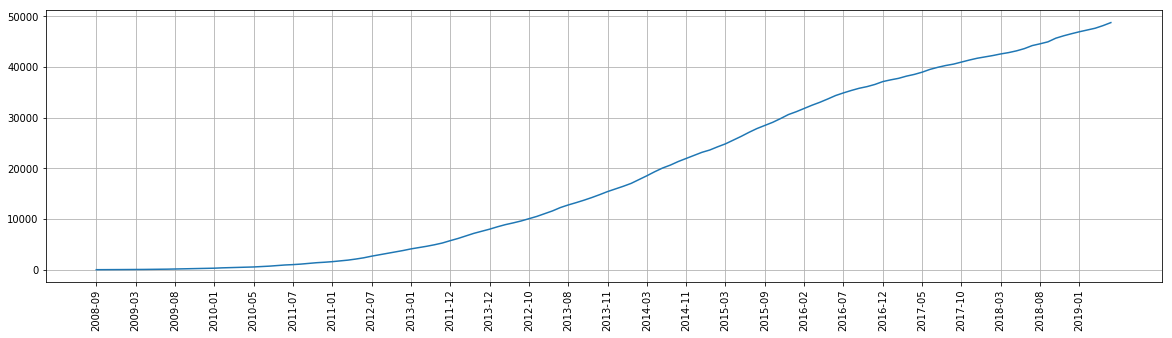

In [10]:
historic_host_since_count_df = historic_num_listing_df.groupby('yyyy-mm').count()
new_list = list(historic_host_since_count_df['id'])

from functools import reduce
accumulate_list = [reduce((lambda x,y : x + y), new_list[:i]) for i in range(1, len(new_list))]
host_since_list = historic_num_listing_df['yyyy-mm'].unique()

plt.figure(figsize = (20,5))
plt.grid(True)
plt.plot(np.arange(len(accumulate_list)), accumulate_list)
plt.xticks(np.arange(0,len(accumulate_list),5), host_since_list[::5], rotation = 90)
plt.show()

### 2. Historic Price

In [11]:
historic_folder_path = "../Resources/Airbnb/New_York_Historic_Data/*.csv"
historic_file_paths = glob.glob(historic_folder_path)

dates = []
historic_cols = ["room_type", 'borough', 'accommodates','price','latitude','longitude', 'last_modified']

historic_df = pd.DataFrame(columns=['date', 
                                    'price', 
                                    'entire_apt_count', 
                                    'private_room_count', 
                                    'share_room_count', 
                                    'Total count'])
i = 0
for path in sorted(historic_file_paths):#sorted(historic_file_paths):
    # date in yyyy-mm-dd
    date = path.split("/")[-1].split("_")[-1].split(".")[0].replace("-","_")
    dates.append(date)
    
    # DataFrame 
    df = pd.read_csv(path)
    df_rdc = df[historic_cols]
    df_rdc['last_modified'] = date
    historic_df.loc[i] = [date,
                          round(df_rdc['price'].mean(),2), 
                          df_rdc.groupby("room_type").count().iloc[0,2], 
                          df_rdc.groupby("room_type").count().iloc[1,2], 
                          df_rdc.groupby("room_type").count().iloc[2,2], 
                          df_rdc.count()['price']]
    i += 1

/Users/desanuj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


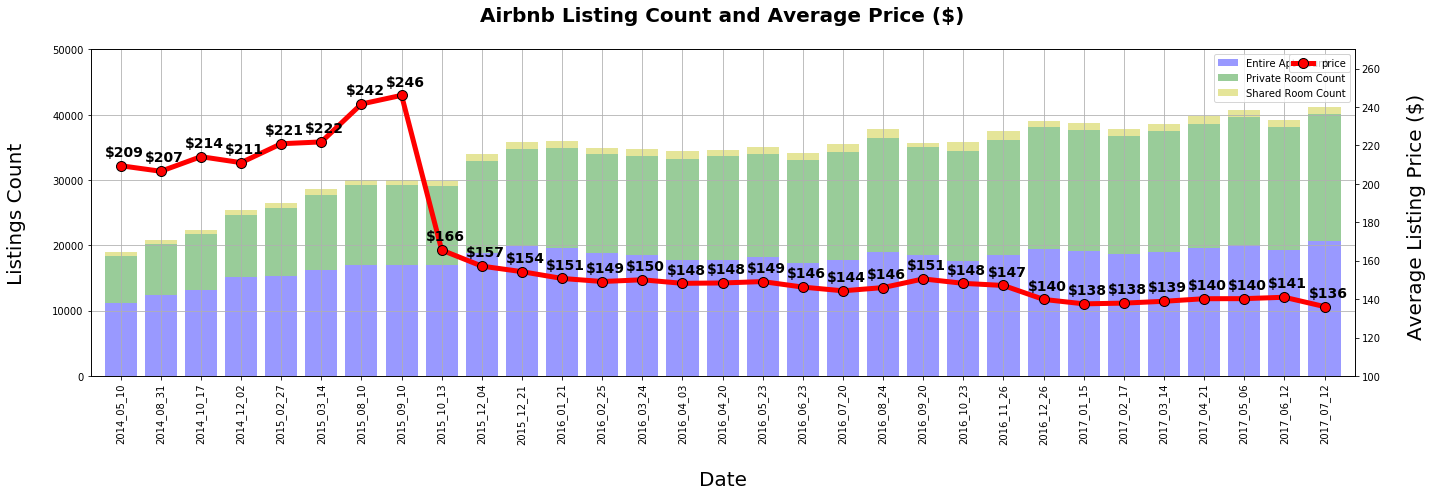

In [12]:
x = np.arange(historic_df.count()[1])
fig, ax1 = plt.subplots(figsize = (20,7))
plt.grid(True)
plt.xlim(-0.75, len(x) - 0.25)
ax1.set_xlabel("\nDate", fontsize = 20)
ax1.set_xticks(np.arange(historic_df.count()[1]))
ax1.set_xticklabels(historic_df['date'], rotation = 90)
ax1.set_ylabel("Listings Count\n", fontsize = 20)

ax1.bar(x, historic_df['entire_apt_count'], color = 'blue', label = 'Entire Apt Count', alpha = 0.4)
ax1.bar(x, historic_df['private_room_count'],
        bottom=historic_df['entire_apt_count'], color = 'green', label = 'Private Room Count', alpha = 0.4)
ax1.bar(x, historic_df['share_room_count'],
        bottom=historic_df['private_room_count'] + historic_df['entire_apt_count'],
        color = 'y', label = 'Shared Room Count', alpha = 0.4)
ax1.set_ylim(0, 50000)

ax1.legend()

ax2 = ax1.twinx()
ax2.plot(x, historic_df['price'], 'ro-', markersize = 10, mec = 'k', linewidth = 5, label = 'price')
for i in range(len(x)):
    ax2.text(x[i] - 0.4, historic_df['price'][i] + 5, "${:.0f}".format(historic_df['price'][i]) , 
             fontsize = 14,weight='bold')
ax2.set_ylabel("\nAverage Listing Price ($) ", fontsize = 20)
ax2.set_ylim(100, 270)

plt.title("Airbnb Listing Count and Average Price ($)\n", fontsize = 20, weight = "bold")
plt.legend()
plt.tight_layout()
plt.show()

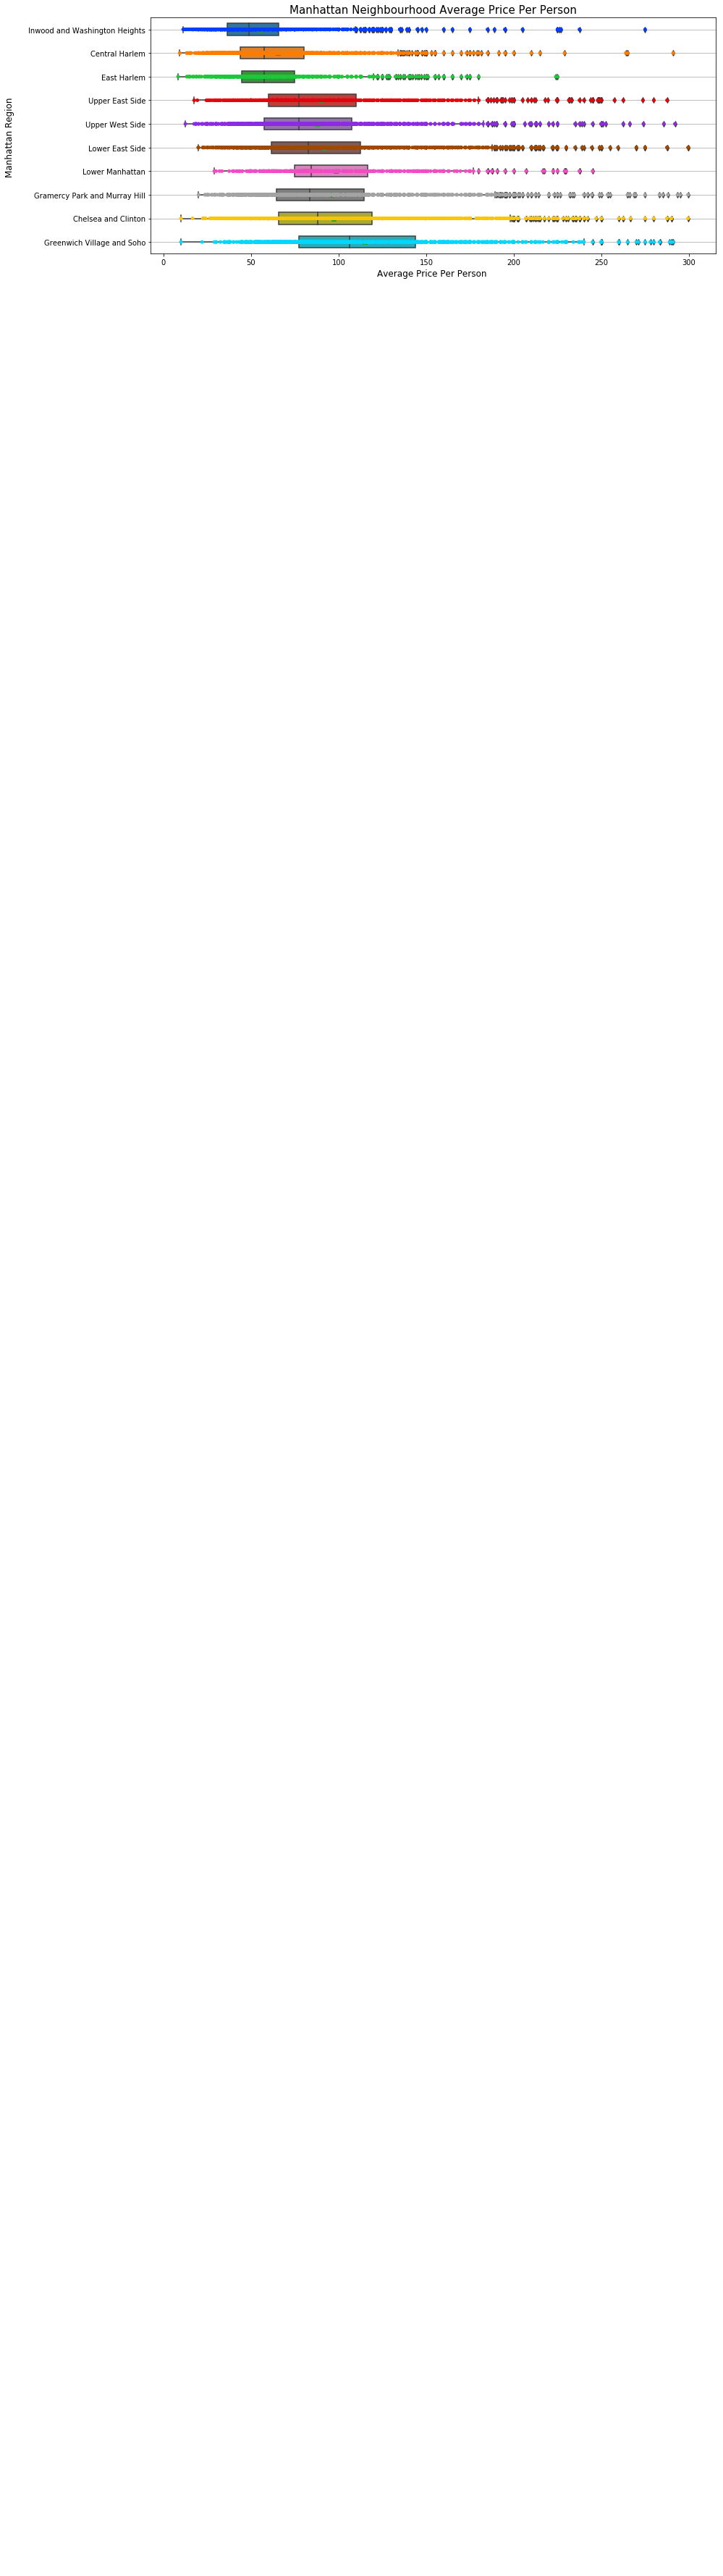

In [38]:
import seaborn as sns

city_df = clean_airbnb.loc[clean_airbnb['City'] == 'New York']

city_df = city_df[city_df['Price Per Person'] < 300].copy()

# Calculate number of obs per group & median to position labels
means = clean_airbnb.groupby(['Region'])['Price Per Person'].median()
sorted_regions = means.sort_values().index
nobs = [str(x) for x in means.tolist()]
nobs = ["Mean $:" + i for i in nobs]

f, ax = plt.subplots(1, 1, sharey=True, figsize=(14, 6))

ax =sns.boxplot(x='Price Per Person', y='Region', data= city_df, width=0.5, 
                  showmeans=True, order = sorted_regions)
                  
ax =sns.stripplot(x='Price Per Person', y='Region',data= city_df, jitter=False, palette = 'bright',
                  color = 'blue', order = sorted_regions)                  

plt.title('Manhattan Neighbourhood Average Price Per Person', fontsize=15)
plt.ylabel('Manhattan Region \n', fontsize= 12)
plt.xlabel('Average Price Per Person \n', fontsize= 12)
ax.yaxis.grid(True)

# set color
#plt.setp(bp['boxes'], color='green')
#plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='*')


# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], means[tick] + 0.03, nobs[tick],
   horizontalalignment='center', size='medium', color='w', weight='bold')
    
plt.savefig("priceperregion.png")
    
    

In [ ]:

manhattan_data= clean_airbnb.loc[clean_airbnb['City'] == 'Manhattan']

neighbour_avg_price = manhattan_data.groupby('Neighbourhood')['Price'].mean()

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral", "red", "green"]

#Only explode the third section of the pie chart.
explode = (0, 0, 0, 0.1, 0)

#Create the pie chart.
plt.pie(neighbour_avg_price, labels = neighbour_avg_price.index, autopct = "%1.2f%%", colors = colors, 
        explode = explode, shadow = True, startangle = 90)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")
plt.title('Manhattan neighbourhood average price')
#Add the legend.
#plt.legend(loc = "best")
plt.show()